In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
pd.set_option('display.max_columns', 50)

# Spotify Dataset EDA

In [66]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [4]:
df.head()

uris                         names        artist_names  \
0  5u5MpBnvJejW9dHPrfWEXZ                     Superstar             Jamelia   
1  5DqrMSaG6KXa9PWlnnKJyb                        Dreams           GABRIELLE   
2  2nGFzvICaeEWjIrBrL2RAx           Put Your Records On  Corinne Bailey Rae   
3  1Xsxp1SEOxuMzjrFZhtw8u                    Next To Me         Emeli Sandé   
4  3stnrhzN0lzZFskbaZ5sEw  Scandalous - U.S. Radio Edit            Mis-Teeq   

              artist_uris  artist_pop  \
0  3f5W9NEwkc1SAIPFuumcaf          51   
1  7rftfGIYEeZ79sLb58ZBDi          56   
2  29WzbAQtDnBJF09es0uddn          63   
3  7sfgqEdoeBTjd8lQsPT3Cy          61   
4  6csA2rxNLkQJXeEa7lyGXn          44   

                                      artist_genres  \
0                        ['europop', 'talent show']   
1                  ['british soul', 'new wave pop']   
2  ['british soul', 'neo soul', 'pop soul', 'soul']   
3                  ['r&b', 'talent show', 'uk pop']   
4                       ['girl group', 'uk garage']   

                                          albums  track_pop  danceability  \
0                                      Thank You         70         0.801   
1  Dreams Can Come True - Greatest Hits Volume 1         46         0.744   
2                             Corinne Bailey Rae         80         0.739   
3                          Our Version Of Events         55         0.674   
4                                       Mis-Teeq         60         0.734   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0   0.645     1    -6.930      1       0.0356        0.0460          0.000000   
1   0.632     9    -7.810      1       0.0317        0.0556          0.000000   
2   0.511     9    -7.844      1       0.0362        0.1670          0.000001   
3   0.810     7    -5.117      0       0.0378        0.0923          0.000047   
4   0.668     0    -3.935      0       0.0349        0.0526          0.000000   

   liveness  valences   tempos           types                     ids  \
0    0.0357     0.824  110.011  audio_features  5u5MpBnvJejW9dHPrfWEXZ   
1    0.0973     0.542   98.755  audio_features  5DqrMSaG6KXa9PWlnnKJyb   
2    0.1330     0.542   96.038  audio_features  2nGFzvICaeEWjIrBrL2RAx   
3    0.1100     0.391   94.995  audio_features  1Xsxp1SEOxuMzjrFZhtw8u   
4    0.0925     0.651   99.971  audio_features  3stnrhzN0lzZFskbaZ5sEw   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5u5MpBnvJejW...   
1  https://api.spotify.com/v1/tracks/5DqrMSaG6KXa...   
2  https://api.spotify.com/v1/tracks/2nGFzvICaeEW...   
3  https://api.spotify.com/v1/tracks/1Xsxp1SEOxuM...   
4  https://api.spotify.com/v1/tracks/3stnrhzN0lzZ...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5u5M...        215480   
1  https://api.spotify.com/v1/audio-analysis/5Dqr...        226987   
2  https://api.spotify.com/v1/audio-analysis/2nGF...        215360   
3  https://api.spotify.com/v1/audio-analysis/1Xsx...        196867   
4  https://api.spotify.com/v1/audio-analysis/3stn...        238840   

   time_signatures       playlist_name  Unnamed: 0.9  Unnamed: 0.8  \
0                4  Throwback Thursday           NaN           NaN   
1                4  Throwback Thursday           NaN           NaN   
2                4  Throwback Thursday           NaN           NaN   
3                4  Throwback Thursday           NaN           NaN   
4                4  Throwback Thursday           NaN           NaN   

   Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN    

In [5]:
df.shape

(6588, 36)

In [6]:
df.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids',
       'track_hrefs', 'analysis_urls', 'durations_ms', 'time_signatures',
       'playlist_name', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],
      dtype='object')

## Remove Uneccessary Columns

In [3]:
def select_columns(df):
    df =  df[['uris', 'artist_pop',
       'artist_genres', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms', 'time_signatures']]
    return df
    
df = select_columns(df)

NameError: name 'df' is not defined

In [68]:
df.head()

uris  artist_pop  \
0  5u5MpBnvJejW9dHPrfWEXZ          51   
1  5DqrMSaG6KXa9PWlnnKJyb          56   
2  2nGFzvICaeEWjIrBrL2RAx          63   
3  1Xsxp1SEOxuMzjrFZhtw8u          61   
4  3stnrhzN0lzZFskbaZ5sEw          44   

                                      artist_genres  track_pop  danceability  \
0                        ['europop', 'talent show']         70         0.801   
1                  ['british soul', 'new wave pop']         46         0.744   
2  ['british soul', 'neo soul', 'pop soul', 'soul']         80         0.739   
3                  ['r&b', 'talent show', 'uk pop']         55         0.674   
4                       ['girl group', 'uk garage']         60         0.734   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0   0.645     1    -6.930      1       0.0356        0.0460          0.000000   
1   0.632     9    -7.810      1       0.0317        0.0556          0.000000   
2   0.511     9    -7.844      1       0.0362        0.1670          0.000001   
3   0.810     7    -5.117      0       0.0378        0.0923          0.000047   
4   0.668     0    -3.935      0       0.0349        0.0526          0.000000   

   liveness  valences   tempos  durations_ms  time_signatures  
0    0.0357     0.824  110.011        215480                4  
1    0.0973     0.542   98.755        226987                4  
2    0.1330     0.542   96.038        215360                4  
3    0.1100     0.391   94.995        196867                4  
4    0.0925     0.651   99.971        238840                4

## Basic EDA and Visualizations

In [9]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  6588.000000  6588.000000   6588.000000  6588.000000  6588.000000   
mean     54.270036    55.696114      0.588181     0.538318     5.213418   
std      18.944297    17.151800      0.181641     0.270268     3.594522   
min       1.000000     7.000000      0.060700     0.000155     0.000000   
25%      41.000000    43.000000      0.486750     0.361000     2.000000   
50%      55.000000    56.000000      0.612000     0.581000     5.000000   
75%      69.000000    69.000000      0.719000     0.751000     8.000000   
max     100.000000   100.000000      0.979000     0.996000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  6588.000000  6588.000000  6588.000000   6588.000000       6588.000000   
mean    -10.449874     0.661506     0.077472      0.379892          0.165573   
std       8.213359     0.473233     0.082415      0.355703          0.328043   
min     -48.069000     0.000000     0.022700      0.000002          0.000000   
25%     -11.069000     0.000000     0.035200      0.049300          0.000000   
50%      -7.688000     1.000000     0.045200      0.249000          0.000079   
75%      -5.693000     1.000000     0.074525      0.716000          0.045825   
max       0.381000     1.000000     0.798000      0.996000          0.993000   

          liveness     valences       tempos   durations_ms  time_signatures  
count  6588.000000  6588.000000  6588.000000    6588.000000      6588.000000  
mean      0.162839     0.462889   117.468963  204957.859897         3.912113  
std       0.124845     0.251369    28.555123   53822.827633         0.431441  
min       0.017400     0.000000    48.360000   60720.000000         1.000000  
25%       0.095800     0.258750    95.490000  168688.250000         4.000000  
50%       0.114000     0.453000   117.968500  197162.500000         4.000000  
75%       0.178000     0.659000   134.981250  231339.750000         4.000000  
max       0.962000     0.981000   216.490000  600457.000000         5.000000

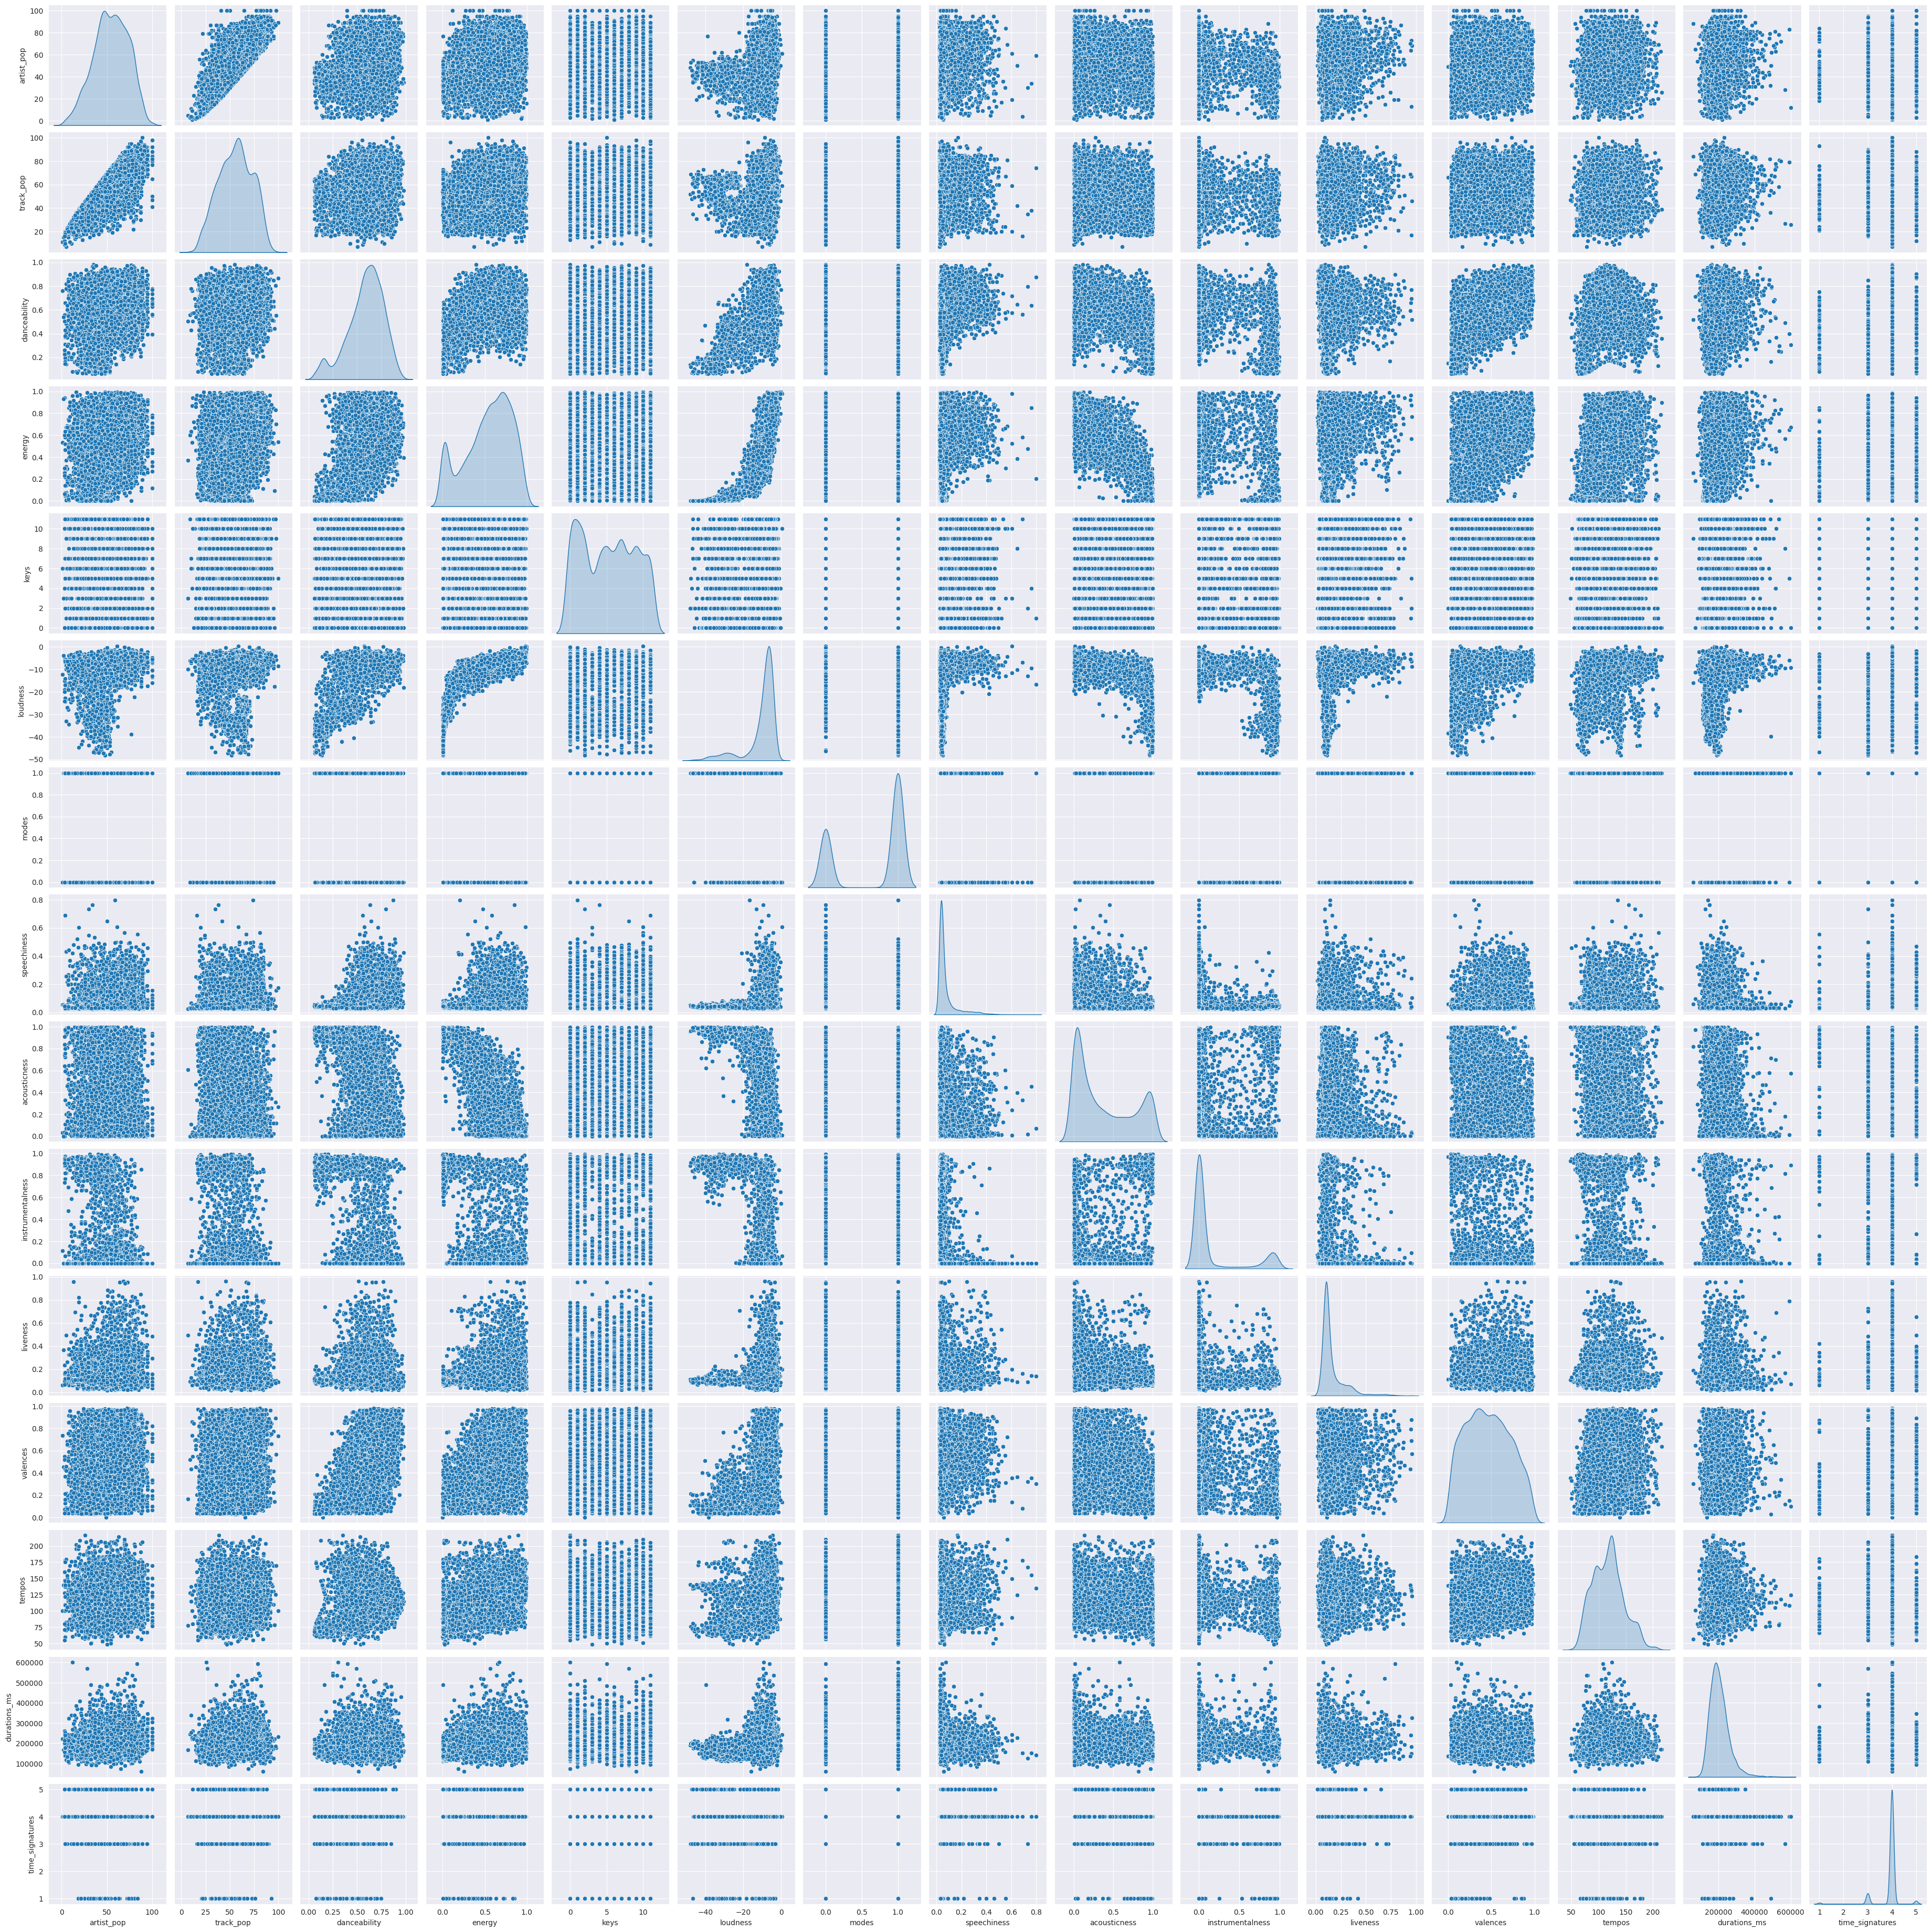

In [69]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Creation

### One Hot Encoding

In [4]:
def ohe_prep(df, column):
    df_encoded = pd.get_dummies(df, columns=[column], dtype=int) 
    return df_encoded

In [70]:
df_test = ohe_prep(df, 'modes')

In [71]:
df_test.columns

Index(['uris', 'artist_pop', 'artist_genres', 'track_pop', 'danceability',
       'energy', 'keys', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms',
       'time_signatures', 'modes_0', 'modes_1'],
      dtype='object')

In [72]:
df_test['modes_0']

0       0
1       0
2       0
3       1
4       1
       ..
6583    1
6584    1
6585    1
6586    0
6587    1
Name: modes_0, Length: 6588, dtype: int64

### Normalize Popularity Values

In [73]:
scaler = MinMaxScaler()
df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

### TFID Transformation

In [16]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
tfidf_matrix = tf.fit_transform(df['artist_genres'])

In [17]:
len(tf.vocabulary_)

668

In [18]:
tfidf_matrix.shape

(6588, 668)

In [19]:
tfidf_matrix[:4, :4]

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [20]:
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())

In [21]:
genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

In [22]:
genre_df.head()

genre|528hz  genre|5th  genre|abstract  genre|acid  genre|acoustic  \
0          0.0        0.0             0.0         0.0             0.0   
1          0.0        0.0             0.0         0.0             0.0   
2          0.0        0.0             0.0         0.0             0.0   
3          0.0        0.0             0.0         0.0             0.0   
4          0.0        0.0             0.0         0.0             0.0   

   genre|adelaide  genre|adult  genre|aesthetic  genre|african  \
0             0.0          0.0              0.0            0.0   
1             0.0          0.0              0.0            0.0   
2             0.0          0.0              0.0            0.0   
3             0.0          0.0              0.0            0.0   
4             0.0          0.0              0.0            0.0   

   genre|afrikaans  genre|afro  genre|afrobeats  genre|afrofuturism  \
0              0.0         0.0              0.0                 0.0   
1              0.0         0.0              0.0                 0.0   
2              0.0         0.0              0.0                 0.0   
3              0.0         0.0              0.0                 0.0   
4              0.0         0.0              0.0                 0.0   

   genre|afropop  genre|afroswing  genre|age  genre|alaska  genre|alberta  \
0            0.0              0.0        0.0           0.0            0.0   
1            0.0              0.0        0.0           0.0            0.0   
2            0.0              0.0        0.0           0.0            0.0   
3            0.0              0.0        0.0           0.0            0.0   
4            0.0              0.0        0.0           0.0            0.0   

   genre|album  genre|algerien  genre|alt  genre|alte  genre|alternative  \
0          0.0             0.0        0.0         0.0                0.0   
1          0.0             0.0        0.0         0.0                0.0   
2          0.0             0.0        0.0         0.0                0.0   
3          0.0             0.0        0.0         0.0                0.0   
4          0.0             0.0        0.0         0.0                0.0   

   genre|amapiano  genre|ambient  ...  genre|virginia  genre|vocal  genre|wa  \
0             0.0            0.0  ...             0.0          0.0       0.0   
1             0.0            0.0  ...             0.0          0.0       0.0   
2             0.0            0.0  ...             0.0          0.0       0.0   
3             0.0            0.0  ...             0.0          0.0       0.0   
4             0.0            0.0  ...             0.0          0.0       0.0   

   genre|warrington  genre|washboard  genre|wave  genre|welle  genre|welsh  \
0               0.0              0.0    0.000000          0.0          0.0   
1               0.0              0.0    0.447328          0.0          0.0   
2               0.0              0.0    0.000000          0.0          0.0   
3               0.0              0.0    0.000000          0.0          0.0   
4               0.0              0.0    0.000000          0.0          0.0   

   genre|west  genre|western  genre|winnipeg  genre|women  genre|wonky  \
0         0.0            0.0             0.0          0.0          0.0   
1         0.0            0.0             0.0          0.0          0.0   
2         0.0            0.0             0.0          0.0          0.0   
3         0.0            0.0             0.0          0.0          0.0   
4         0.0            0.0             0.0          0.0          0.0   

   genre|wop  genre|world  genre|worship  genre|worth  genre|xhosa  \
0        0.0          0.0            0.0          0.0          0.0   
1        0.0          0.0            0.0          0.0          0.0   
2        0.0          0.0            0.0          0.0          0.0   
3        0.0          0.0            0.0          0.0          0.0   
4        0.0          0.0            0.0          0.0          0.0   

   g

In [23]:
genre_df.describe()

genre|528hz    genre|5th  genre|abstract   genre|acid  genre|acoustic  \
count  6588.000000  6588.000000     6588.000000  6588.000000     6588.000000   
mean      0.000152     0.000067        0.000414     0.000469        0.008828   
std       0.012320     0.005418        0.017124     0.015027        0.075014   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       0.000000     0.000000        0.000000     0.000000        0.000000   
50%       0.000000     0.000000        0.000000     0.000000        0.000000   
75%       0.000000     0.000000        0.000000     0.000000        0.000000   
max       1.000000     0.439726        0.760237     0.883921        0.843332   

       genre|adelaide  genre|adult  genre|aesthetic  genre|african  \
count     6588.000000  6588.000000      6588.000000    6588.000000   
mean         0.000133     0.000716         0.000208       0.004325   
std          0.010788     0.016954         0.012649       0.050730   
min          0.000000     0.000000         0.000000       0.000000   
25%          0.000000     0.000000         0.000000       0.000000   
50%          0.000000     0.000000         0.000000       0.000000   
75%          0.000000     0.000000         0.000000       0.000000   
max          0.875628     0.484480         0.925477       0.898676   

       genre|afrikaans   genre|afro  genre|afrobeats  genre|afrofuturism  \
count      6588.000000  6588.000000      6588.000000         6588.000000   
mean          0.000322     0.001956         0.002465            0.001331   
std           0.015726     0.029665         0.042545            0.032524   
min           0.000000     0.000000         0.000000            0.000000   
25%           0.000000     0.000000         0.000000            0.000000   
50%           0.000000     0.000000         0.000000            0.000000   
75%           0.000000     0.000000         0.000000            0.000000   
max           1.000000     0.695601         1.000000            1.000000   

       genre|afropop  genre|afroswing    genre|age  genre|alaska  \
count    6588.000000      6588.000000  6588.000000   6588.000000   
mean        0.000870         0.000860     0.000831      0.000083   
std         0.020094         0.023835     0.019694      0.006697   
min         0.000000         0.000000     0.000000      0.000000   
25%         0.000000         0.000000     0.000000      0.000000   
50%         0.000000         0.000000     0.000000      0.000000   
75%         0.000000         0.000000     0.000000      0.000000   
max         0.776465         1.000000     0.838653      0.543563   

       genre|alberta  genre|album  genre|algerien    genre|alt   genre|alte  \
count    6588.000000  6588.000000     6588.000000  6588.000000  6588.000000   
mean        0.001238     0.006080        0.000347     0.011552     0.000204   
std         0.026631     0.038566        0.014120     0.093341     0.011705   
min         0.000000     0.000000        0.000000     0.000000     0.000000   
25%         0.000000     0.000000        0.000000     0.000000     0.000000   
50%         0.000000     0.000000        0.000000     0.000000     0.000000   
75%         0.000000     0.000000        0.000000     0.000000     0.000000   
max         0.829935     0.507758        0.591803     1.000000     0.671850   

       genre|alternative  genre|amapiano  genre|ambient  ...  genre|virginia  \
count        6588.000000     6588.000000    6588.000000  ...     6588.000000   
mean            0.023582        0.002179       0.001381  ...        0.000131   
std             0.104822        0.043930       0.027902  ...        0.007537   
min             0.000000        0.000000       0.000000  ...        0.000000   
25%             0.000000        0.000000       0.000000  ...        0.000000   
50%             0.000000        0.000000       0.000000  ...        0.000000   
75%             0.000000        0.000000       0.000000  ...        0.000000   
max  

In [24]:
genre_df.columns

Index(['genre|528hz', 'genre|5th', 'genre|abstract', 'genre|acid',
       'genre|acoustic', 'genre|adelaide', 'genre|adult', 'genre|aesthetic',
       'genre|african', 'genre|afrikaans',
       ...
       'genre|worship', 'genre|worth', 'genre|xhosa', 'genre|yacht',
       'genre|ye', 'genre|yogyakarta', 'genre|york', 'genre|youth',
       'genre|zolo', 'genre|zouglou'],
      dtype='object', length=668)

In [27]:
def tfidf_transformation(df, tf=None):
    if tf is None:
        tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
        tfidf_matrix = tf.fit_transform(df['artist_genres'])
    else:
        tfidf_matrix = tf.transform(df['artist_genres'])
        
    genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
    genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

    df = df.drop(columns=['artist_genres'])

    df = pd.concat([df.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)  # Reset index to avoid rows being added due to index in memory
    return df, tf

In [75]:
df, tf = tfidf_transformation(df)

In [76]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  6588.000000  6588.000000   6588.000000  6588.000000  6588.000000   
mean      0.538081     0.523614      0.588181     0.538318     5.213418   
std       0.191357     0.184428      0.181641     0.270268     3.594522   
min       0.000000     0.000000      0.060700     0.000155     0.000000   
25%       0.404040     0.387097      0.486750     0.361000     2.000000   
50%       0.545455     0.526882      0.612000     0.581000     5.000000   
75%       0.686869     0.666667      0.719000     0.751000     8.000000   
max       1.000000     1.000000      0.979000     0.996000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  6588.000000  6588.000000  6588.000000   6588.000000       6588.000000   
mean    -10.449874     0.661506     0.077472      0.379892          0.165573   
std       8.213359     0.473233     0.082415      0.355703          0.328043   
min     -48.069000     0.000000     0.022700      0.000002          0.000000   
25%     -11.069000     0.000000     0.035200      0.049300          0.000000   
50%      -7.688000     1.000000     0.045200      0.249000          0.000079   
75%      -5.693000     1.000000     0.074525      0.716000          0.045825   
max       0.381000     1.000000     0.798000      0.996000          0.993000   

          liveness     valences       tempos   durations_ms  time_signatures  \
count  6588.000000  6588.000000  6588.000000    6588.000000      6588.000000   
mean      0.162839     0.462889   117.468963  204957.859897         3.912113   
std       0.124845     0.251369    28.555123   53822.827633         0.431441   
min       0.017400     0.000000    48.360000   60720.000000         1.000000   
25%       0.095800     0.258750    95.490000  168688.250000         4.000000   
50%       0.114000     0.453000   117.968500  197162.500000         4.000000   
75%       0.178000     0.659000   134.981250  231339.750000         4.000000   
max       0.962000     0.981000   216.490000  600457.000000         5.000000   

       genre|528hz    genre|5th  genre|abstract   genre|acid  genre|acoustic  \
count  6588.000000  6588.000000     6588.000000  6588.000000     6588.000000   
mean      0.000152     0.000067        0.000414     0.000469        0.008828   
std       0.012320     0.005418        0.017124     0.015027        0.075014   
min       0.000000     0.000000        0.000000     0.000000        0.000000   
25%       0.000000     0.000000        0.000000     0.000000        0.000000   
50%       0.000000     0.000000        0.000000     0.000000        0.000000   
75%       0.000000     0.000000        0.000000     0.000000        0.000000   
max       1.000000     0.439726        0.760237     0.883921        0.843332   

       genre|adelaide  genre|adult  genre|aesthetic  genre|african  \
count     6588.000000  6588.000000      6588.000000    6588.000000   
mean         0.000133     0.000716         0.000208       0.004325   
std          0.010788     0.016954         0.012649       0.050730   
min          0.000000     0.000000         0.000000       0.000000   
25%          0.000000     0.000000         0.000000       0.000000   
50%          0.000000     0.000000         0.000000       0.000000   
75%          0.000000     0.000000         0.000000       0.000000   
max          0.875628     0.484480         0.925477       0.898676   

       genre|afrikaans  ...  genre|virginia  genre|vocal     genre|wa  \
count      6588.000000  ...     6588.000000  6588.000000  6588.000000   
mean          0.000322  ...        0.000131     0.000972     0.000083   
std           0.015726  ...        0.007537     0.022114     0.006731   
min           0.000000  ...        0.000000     0.000000     0.000000   
25%           0.000000  ...        0.000000     0.000000     0.000000   
50%           0.000000  ...        0.000000     0.000000     0.000000   
75%           0.000000  ...

## Pipeline

In [158]:
def data_pipeline(df, tf=None):
    # Select only the necessary columns
    df = select_columns(df)

    # Perfrom OHE
    df = ohe_prep(df, 'modes')
    df = ohe_prep(df, 'keys')
    df = ohe_prep(df, 'time_signatures')

    # Normalize popularity values
    scaler = MinMaxScaler()
    df[['artist_pop', 'track_pop', 'durations_ms']] = scaler.fit_transform(df[['artist_pop', 'track_pop', 'durations_ms']])

    # Perform TFID vectorization on genres
    df, tf = tfidf_transformation(df, tf)

    df = df.set_index(keys='uris', drop=True)

    return df, tf

## Pipeline in Action

In [159]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [160]:
df, tf = data_pipeline(df)

In [161]:
df.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5u5MpBnvJejW9dHPrfWEXZ    0.505051   0.677419         0.801   0.645    -6.930   
5DqrMSaG6KXa9PWlnnKJyb    0.555556   0.419355         0.744   0.632    -7.810   
2nGFzvICaeEWjIrBrL2RAx    0.626263   0.784946         0.739   0.511    -7.844   
1Xsxp1SEOxuMzjrFZhtw8u    0.606061   0.516129         0.674   0.810    -5.117   
3stnrhzN0lzZFskbaZ5sEw    0.434343   0.569892         0.734   0.668    -3.935   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5u5MpBnvJejW9dHPrfWEXZ       0.0356        0.0460          0.000000    0.0357   
5DqrMSaG6KXa9PWlnnKJyb       0.0317        0.0556          0.000000    0.0973   
2nGFzvICaeEWjIrBrL2RAx       0.0362        0.1670          0.000001    0.1330   
1Xsxp1SEOxuMzjrFZhtw8u       0.0378        0.0923          0.000047    0.1100   
3stnrhzN0lzZFskbaZ5sEw       0.0349        0.0526          0.000000    0.0925   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5u5MpBnvJejW9dHPrfWEXZ     0.824  110.011      0.286732        0        1   
5DqrMSaG6KXa9PWlnnKJyb     0.542   98.755      0.308052        0        1   
2nGFzvICaeEWjIrBrL2RAx     0.542   96.038      0.286510        0        1   
1Xsxp1SEOxuMzjrFZhtw8u     0.391   94.995      0.252247        1        0   
3stnrhzN0lzZFskbaZ5sEw     0.651   99.971      0.330013        1        0   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5u5MpBnvJejW9dHPrfWEXZ       0       1       0       0       0       0   
5DqrMSaG6KXa9PWlnnKJyb       0       0       0       0       0       0   
2nGFzvICaeEWjIrBrL2RAx       0       0       0       0       0       0   
1Xsxp1SEOxuMzjrFZhtw8u       0       0       0       0       0       0   
3stnrhzN0lzZFskbaZ5sEw       1       0       0       0       0       0   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5u5MpBnvJejW9dHPrfWEXZ       0       0       0       0        0  ...   
5DqrMSaG6KXa9PWlnnKJyb       0       0       0       1        0  ...   
2nGFzvICaeEWjIrBrL2RAx       0       0       0       1        0  ...   
1Xsxp1SEOxuMzjrFZhtw8u       0       1       0       0        0  ...   
3stnrhzN0lzZFskbaZ5sEw       0       0       0       0        0  ...   

                        genre|virginia  genre|vocal  genre|wa  \
uris                                                            
5u5MpBnvJejW9dHPrfWEXZ             0.0          0.0       0.0   
5DqrMSaG6KXa9PWlnnKJyb             0.0          0.0       0.0   
2nGFzvICaeEWjIrBrL2RAx             0.0          0.0       0.0   
1Xsxp1SEOxuMzjrFZhtw8u             0.0          0.0       0.0   
3stnrhzN0lzZFskbaZ5sEw             0.0          0.0       0.0   

                        genre|warrington  genre|washboard  genre|wave  \
uris                                                                    
5u5MpBnvJejW9dHPrfWEXZ               0.0              0.0    0.000000   
5DqrMSaG6KXa9PWlnnKJyb               0.0              0.0    0.447328   
2nGFzvICaeEWjIrBrL2RAx               0.0              0.0    0.000000   
1Xsxp1SEOxuMzjrFZhtw8u               0.0              0.0    0.000000   
3stnrhzN0lzZFskbaZ5sEw               0.0              0.0    0.000000   

                        genre|welle  genre|welsh  genre|west  genre|western  \
uris                                                                          
5u5MpBnvJejW9dHPrfWEXZ          0.0          0.0         0.0            0.0   
5DqrMSaG6KXa9PWlnnKJyb          0.0          0.0         0.0            0.0   
2nGFzvICaeEWjIrBrL2RAx          0.0     

In [82]:
df.shape

(6588, 695)

In [83]:
assert(df.shape[0] == 6588)

## Create Target Playlist Summary Vector (Depreciated)

If the pipeline processes the dataset and the target playlist separately, there will exist a discrepancy in vector sizes. 
Below is an attempt to use two separate pipeline processes. However, this results in differing vector sizes due to the OHE.
The correct process will be in the following section

In [162]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [163]:
df_target.shape

(34, 28)

Perform simple EDA for visual comparison against all tracks collected

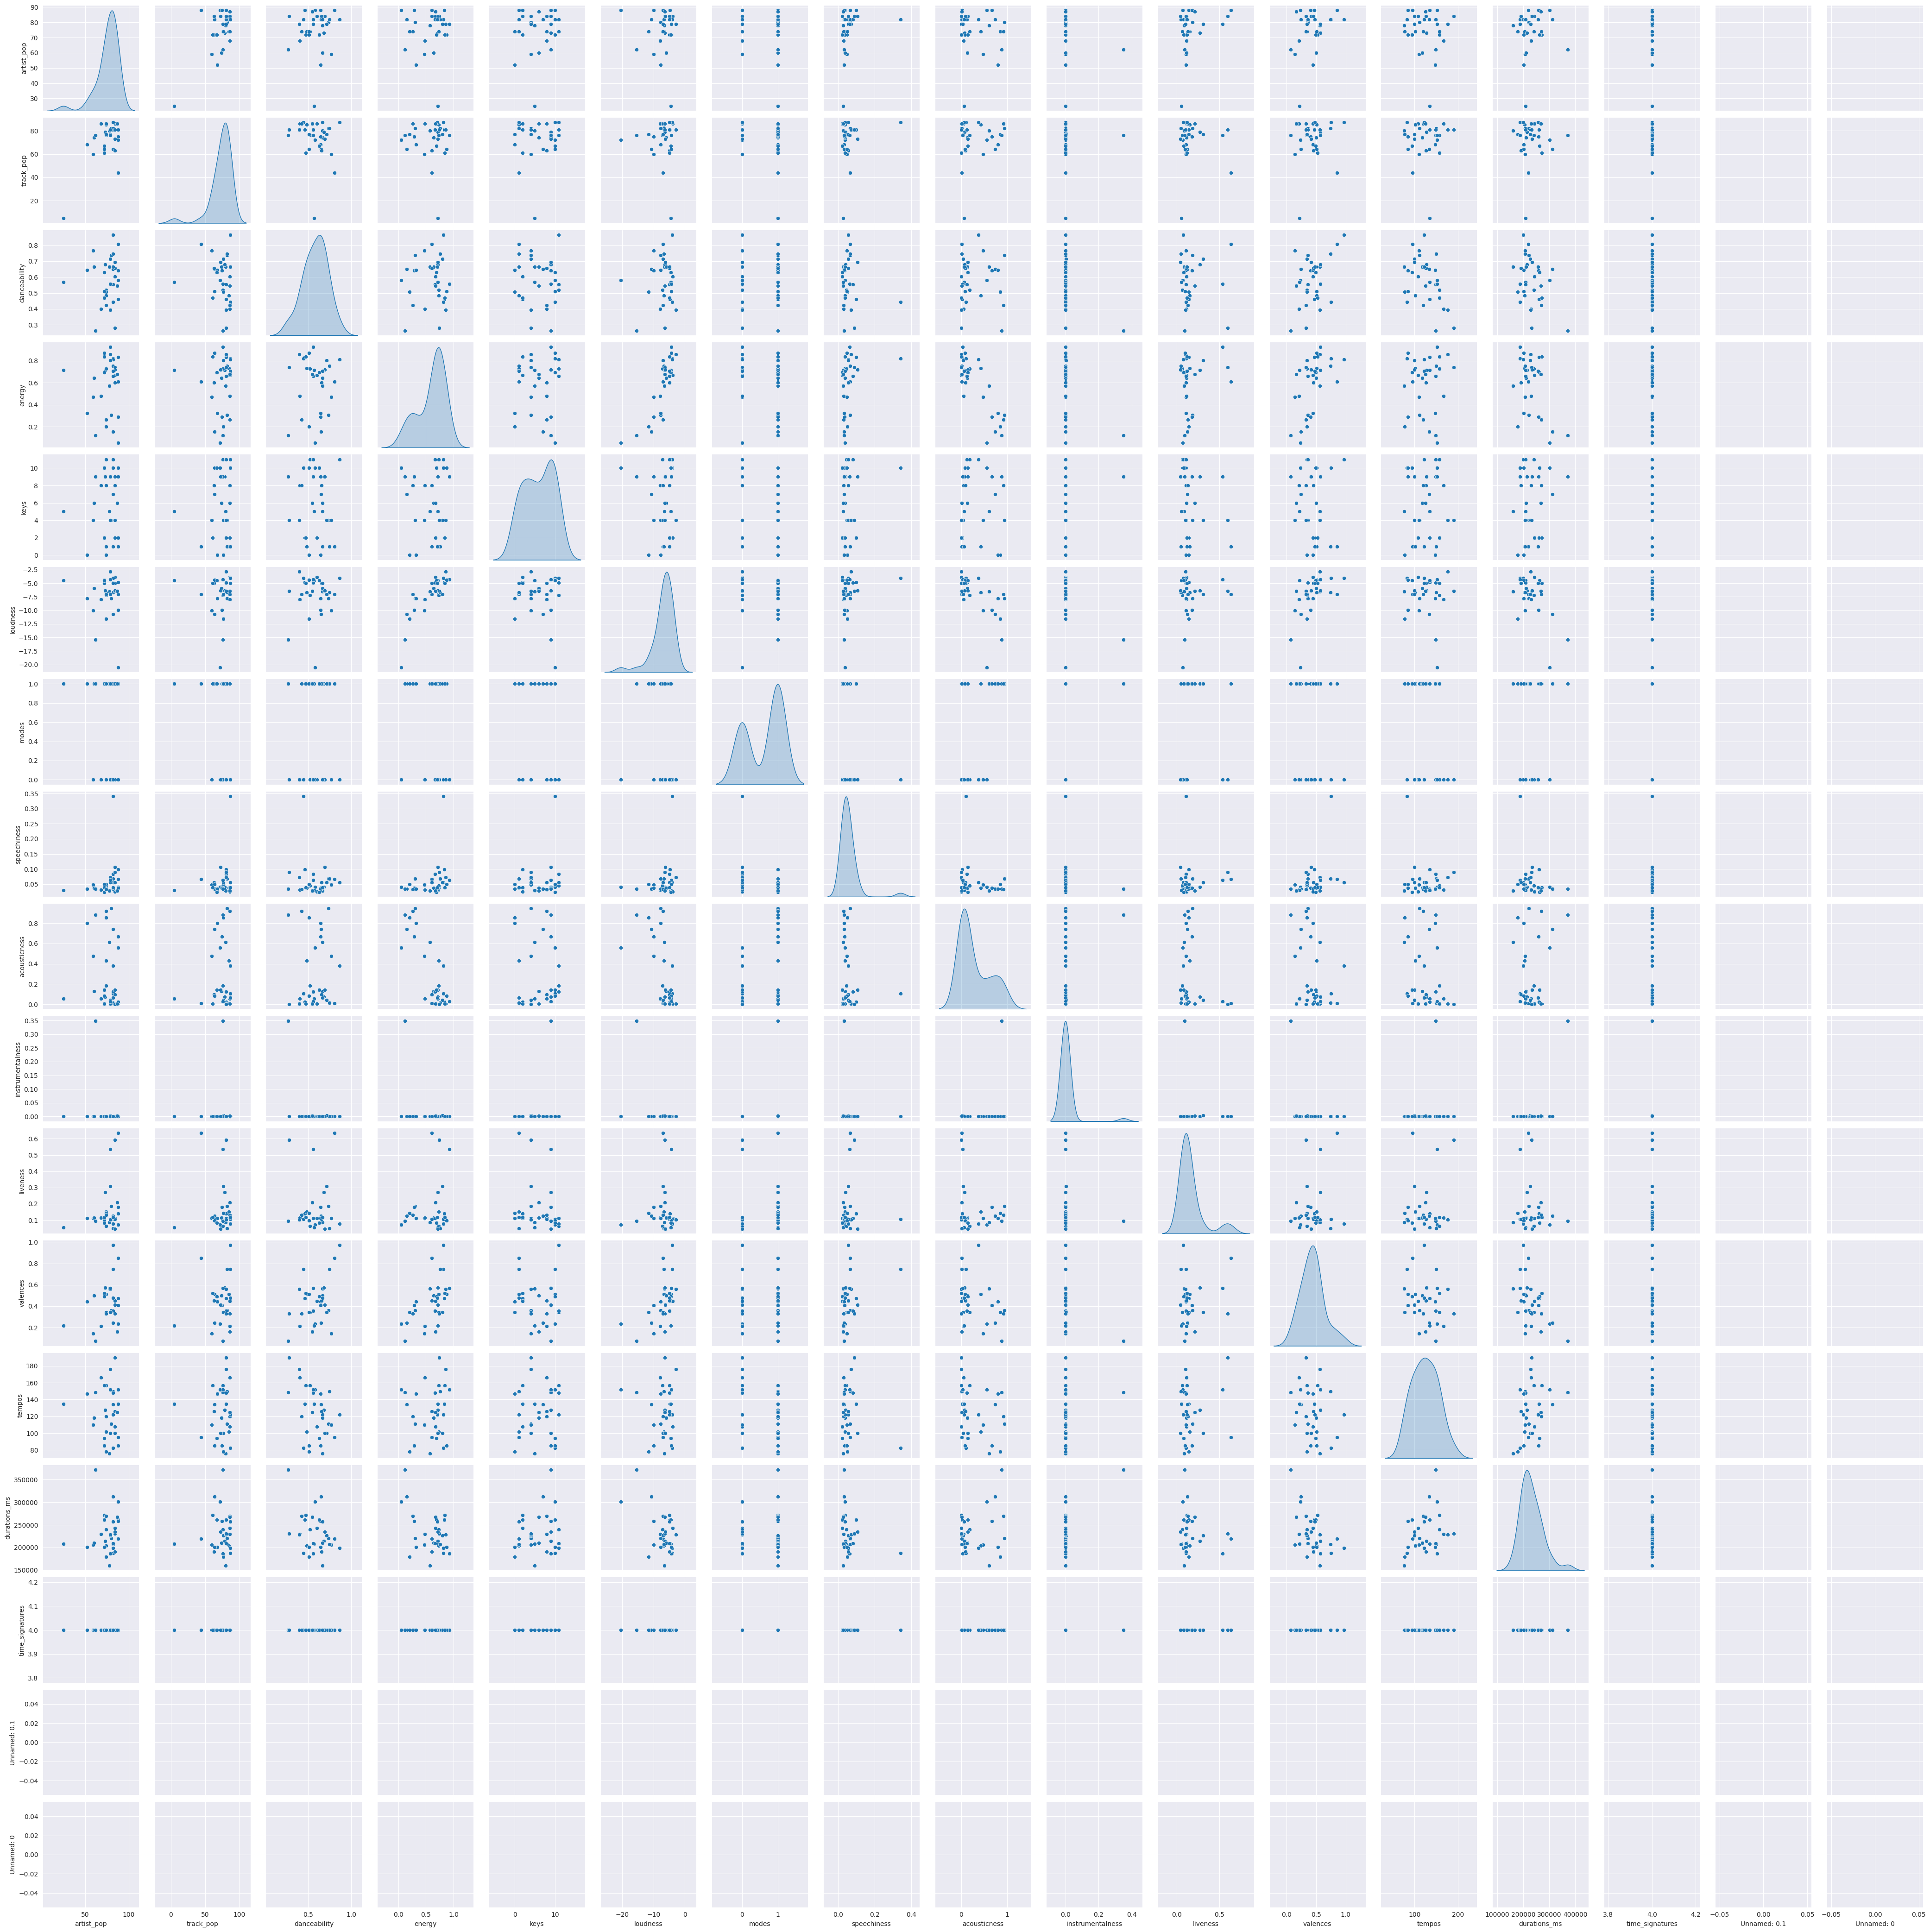

In [86]:
sns.pairplot(df_target, diag_kind='kde')
plt.show()

In [55]:
df_target.describe()

artist_pop  track_pop  danceability     energy       keys   loudness  \
count   34.000000  34.000000     34.000000  34.000000  34.000000  34.000000   
mean    75.676471  73.794118      0.581794   0.598997   5.911765  -7.030559   
std     12.634058  15.623951      0.140948   0.241653   3.646232   3.489547   
min     25.000000   5.000000      0.264000   0.054900   0.000000 -20.514000   
25%     72.250000  69.000000      0.489750   0.473000   2.500000  -7.661000   
50%     79.000000  77.000000      0.592000   0.684500   6.000000  -6.467000   
75%     83.500000  82.000000      0.664000   0.751000   9.000000  -4.889000   
max     88.000000  87.000000      0.866000   0.924000  11.000000  -2.868000   

           modes  speechiness  acousticness  instrumentalness   liveness  \
count  34.000000    34.000000     34.000000         34.000000  34.000000   
mean    0.617647     0.058471      0.284441          0.010449   0.163503   
std     0.493270     0.054306      0.327722          0.059825   0.145838   
min     0.000000     0.024200      0.000185          0.000000   0.046400   
25%     0.000000     0.034075      0.031200          0.000000   0.094875   
50%     1.000000     0.042950      0.115500          0.000000   0.113000   
75%     1.000000     0.065425      0.538250          0.000001   0.149000   
max     1.000000     0.341000      0.946000          0.349000   0.635000   

        valences      tempos   durations_ms  time_signatures  Unnamed: 0.1  \
count  34.000000   34.000000      34.000000             34.0           0.0   
mean    0.438544  124.538059  231425.000000              4.0           NaN   
std     0.196420   29.422301   42303.823942              0.0           NaN   
min     0.073500   76.023000  160097.000000              4.0           NaN   
25%     0.334000  100.414250  204751.750000              4.0           NaN   
50%     0.445000  123.493000  223615.500000              4.0           NaN   
75%     0.519250  148.525500  258096.500000              4.0           NaN   
max     0.969000  189.868000  371320.000000              4.0           NaN   

       Unnamed: 0  
count         0.0  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

### Create Target Features

In [87]:
df, tf = data_pipeline(df)
df_target, tf = data_pipeline(df_target, tf)

In [88]:
df_target.shape

(34, 694)

In [94]:
df.shape

(6588, 695)

In [89]:
df_target.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    1.000000   0.475610         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    1.000000   0.926829         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.936508   0.987805         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    1.000000   0.817073         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.841270   0.914634         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  time_signatures  \
uris                                                                       
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049        219840                4   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007        261154                4   
3di5hcvxxciiqwMH1jarhY     0.446  107.993        242974                4   
3B7udSGy2PfgoCniMSb523     0.234  152.037        300840                4   
5NORWMFC27ywGSZxi8uquP     0.566   76.023        160097                4   

                        modes_0  modes_1  keys_0  keys_1  keys_2  keys_4  \
uris                                                                       
5LTzAKRZ2Xct8d6vVrErha        0        1       0       1       0       0   
6PCUP3dWmTjcTtXY02oFdT        0        1       0       0       1       0   
3di5hcvxxciiqwMH1jarhY        1        0       0       0       1       0   
3B7udSGy2PfgoCniMSb523        1        0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP        0        1       0       0       0       0   

                        keys_5  keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                                     ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       1       0       0       0       0        0  ...   

                        genre|virginia  genre|vocal  genre|wa  \
uris                                                            
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0       0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0       0.0   
3B7udSGy2PfgoCniMSb523             0.0          0.0       0.0   
5NORWMFC27ywGSZxi8uquP             0.0          0.0       0.0   

                        genre|warrington  genre|washboard  genre|wave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha               0.0              0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0              0.0         0.0   
3di5hcvxxciiqwMH1jarhY               0.0              0.0         0.0   
3B7udSGy2PfgoCniMSb523               0.0              0.0         0.0   
5NORWMFC27ywGSZxi8uquP               0.0              0.0         0.0   

                        genre|welle  genre|welsh  genre|west  genre|western  \
uris                                                                          
5LTzAKRZ2Xct8d6vVrErha          0.0          0.0         0.0            0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0          0.0        

In [95]:
dif_1 = set(df_target.columns) - set(df.columns)
print(dif_1)

dif_2 = set(df.columns) - set(df_target.columns)
print(dif_2)

set()
{'keys_3'}


In [91]:
df.columns

Index(['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valences',
       ...
       'genre|worship', 'genre|worth', 'genre|xhosa', 'genre|yacht',
       'genre|ye', 'genre|yogyakarta', 'genre|york', 'genre|youth',
       'genre|zolo', 'genre|zouglou'],
      dtype='object', length=695)

## Create Target Features

In [164]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [165]:
dataset_complete = pd.concat([df_target, df], axis=0)
dataset_complete = dataset_complete.reset_index(drop=True)

In [166]:
dataset_complete.head()

uris                                              names  \
0  5LTzAKRZ2Xct8d6vVrErha                                              Don't   
1  6PCUP3dWmTjcTtXY02oFdT                                 Castle on the Hill   
2  3di5hcvxxciiqwMH1jarhY                               Set Fire to the Rain   
3  3B7udSGy2PfgoCniMSb523  I See Fire - From "The Hobbit - The Desolation...   
4  5NORWMFC27ywGSZxi8uquP                                            Ophelia   

    artist_names             artist_uris  artist_pop  \
0     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
1     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
2          Adele  4dpARuHxo51G3z768sgnrY          84   
3     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
4  The Lumineers  16oZKvXb6WkQlVAjwo2Wbg          78   

                                     artist_genres  \
0       ['pop', 'singer-songwriter pop', 'uk pop']   
1       ['pop', 'singer-songwriter pop', 'uk pop']   
2    ['british soul', 'pop', 'pop soul', 'uk pop']   
3       ['pop', 'singer-songwriter pop', 'uk pop']   
4  ['folk-pop', 'modern rock', 'stomp and holler']   

                                              albums  track_pop  danceability  \
0                                x (Wembley Edition)         44         0.806   
1                                         ÷ (Deluxe)         81         0.461   
2                                                 21         86         0.603   
3  The Hobbit - The Desolation Of Smaug (Original...         72         0.581   
4                                          Cleopatra         80         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos           types                     ids  \
0    0.6350     0.849   95.049  audio_features  5LTzAKRZ2Xct8d6vVrErha   
1    0.1400     0.471  135.007  audio_features  6PCUP3dWmTjcTtXY02oFdT   
2    0.1120     0.446  107.993  audio_features  3di5hcvxxciiqwMH1jarhY   
3    0.0718     0.234  152.037  audio_features  3B7udSGy2PfgoCniMSb523   
4    0.0857     0.566   76.023  audio_features  5NORWMFC27ywGSZxi8uquP   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5LTzAKRZ2Xct...   
1  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   
2  https://api.spotify.com/v1/tracks/3di5hcvxxcii...   
3  https://api.spotify.com/v1/tracks/3B7udSGy2Pfg...   
4  https://api.spotify.com/v1/tracks/5NORWMFC27yw...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5LTz...        219840   
1  https://api.spotify.com/v1/audio-analysis/6PCU...        261154   
2  https://api.spotify.com/v1/audio-analysis/3di5...        242974   
3  https://api.spotify.com/v1/audio-analysis/3B7u...        300840   
4  https://api.spotify.com/v1/audio-analysis/5NOR...        160097   

   time_signatures playlist_name  Unnamed: 0.1  Unnamed: 0  Unnamed: 0.9  \
0                4   rob_perform           NaN         NaN           NaN   
1                4   rob_perform           NaN         NaN           NaN   
2                4   rob_perform           NaN         NaN           NaN   
3                4   rob_perform           NaN         NaN           NaN   
4                4   rob_perform           NaN         NaN           NaN   

   Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN    

In [167]:
dataset_complete.shape

(6622, 36)

In [168]:
duplicates = dataset_complete['uris'].duplicated()
duplicated_rows = dataset_complete[duplicates]
print(len(duplicated_rows))

8


In [169]:
dataset_complete = dataset_complete.drop_duplicates(subset='uris', keep='first')

In [170]:
dataset_complete.shape

(6614, 36)

In [171]:
dataset_complete, _ = data_pipeline(df=dataset_complete)

In [172]:
dataset_complete.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.878788   0.410526         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.878788   0.800000         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.838384   0.852632         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.878788   0.705263         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.777778   0.789474         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.294810        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.371355        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.337672        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.444883        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.184121        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|virginia  genre|vocal  genre|wa  \
uris                                                            
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0       0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0       0.0   
3B7udSGy2PfgoCniMSb523             0.0          0.0       0.0   
5NORWMFC27ywGSZxi8uquP             0.0          0.0       0.0   

                        genre|warrington  genre|washboard  genre|wave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha               0.0              0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0              0.0         0.0   
3di5hcvxxciiqwMH1jarhY               0.0              0.0         0.0   
3B7udSGy2PfgoCniMSb523               0.0              0.0         0.0   
5NORWMFC27ywGSZxi8uquP               0.0              0.0         0.0   

                        genre|welle  genre|welsh  genre|west  genre|western  \
uris                                                                          
5LTzAKRZ2Xct8d6vVrErha          0.0          0.0         0.0            0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0          0.0         0.0            0.0   
3di5hcvxxciiqwMH1jarhY          0.0     

In [173]:
dataset_complete.shape

(6614, 698)

## Remove Tracks already in Target

In [174]:
dataset_complete.index

Index(['5LTzAKRZ2Xct8d6vVrErha', '6PCUP3dWmTjcTtXY02oFdT',
       '3di5hcvxxciiqwMH1jarhY', '3B7udSGy2PfgoCniMSb523',
       '5NORWMFC27ywGSZxi8uquP', '5FwlCxV2Q4xjTywLsD3Kxe',
       '4Of7rzpRpV1mWRbhp5rAqG', '3U0UzEdzd45T81FHdPPbfC',
       '7yq4Qj7cqayVTp3FF9CWbm', '6fNhZRFEkBfgW39W3wKARJ',
       ...
       '0O6u0VJ46W86TxN9wgyqDj', '5jQI2r1RdgtuT8S3iG8zFC',
       '4iJyoBOLtHqaGxP12qzhQI', '6RRNNciQGZEXnqk8SQ9yv5',
       '37BZB0z9T8Xu7U3e65qxFy', '2BgEsaKNfHUdlh97KmvFyo',
       '5QDLhrAOJJdNAmCTJ8xMyW', '4jPy3l0RUwlUI9T5XHBW2m',
       '1rqqCSm0Qe4I9rUvWncaom', '7a53HqqArd4b9NF4XAmlbI'],
      dtype='object', name='uris', length=6614)

In [175]:
def unique_tracks(df, df_target):
    df = df.drop(df_target['uris'], errors='ignore')
    return df 

In [176]:
def extract_target(df, df_target):
    target_uris = df_target['uris'].tolist()
    return df[df.index.isin(target_uris)]

In [177]:
target_features = extract_target(dataset_complete, df_target)

In [178]:
target_features.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.878788   0.410526         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.878788   0.800000         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.838384   0.852632         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.878788   0.705263         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.777778   0.789474         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.294810        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.371355        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.337672        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.444883        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.184121        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|virginia  genre|vocal  genre|wa  \
uris                                                            
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0       0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0       0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0       0.0   
3B7udSGy2PfgoCniMSb523             0.0          0.0       0.0   
5NORWMFC27ywGSZxi8uquP             0.0          0.0       0.0   

                        genre|warrington  genre|washboard  genre|wave  \
uris                                                                    
5LTzAKRZ2Xct8d6vVrErha               0.0              0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0              0.0         0.0   
3di5hcvxxciiqwMH1jarhY               0.0              0.0         0.0   
3B7udSGy2PfgoCniMSb523               0.0              0.0         0.0   
5NORWMFC27ywGSZxi8uquP               0.0              0.0         0.0   

                        genre|welle  genre|welsh  genre|west  genre|western  \
uris                                                                          
5LTzAKRZ2Xct8d6vVrErha          0.0          0.0         0.0            0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0          0.0         0.0            0.0   
3di5hcvxxciiqwMH1jarhY          0.0     

In [179]:
target_features.shape

(34, 698)

In [180]:
data_features = unique_tracks(dataset_complete, df_target)

In [181]:
data_features.shape

(6580, 698)

The track dataset and the target are now the exact same dimension. 

## Summarize Target Playlist into a single vector

The source I am following sums the values and then performs a cosine similarity measurement to determine similarity. 
However, I think that averaging the playlist features may allow for a better similarity metric/

In [182]:
target_vec_mean = target_features.mean(axis=0)
target_vec_mean = target_vec_mean.to_numpy().reshape(1, -1)

target_vec_sum = target_features.sum(axis=0)
target_vec_sum = target_vec_sum.to_numpy().reshape(1, -1)

In [183]:
target_vec_mean

array([[ 7.54307784e-01,  7.24148607e-01,  5.81794118e-01,
         5.98997059e-01, -7.03055882e+00,  5.84705882e-02,
         2.84441029e-01,  1.04490747e-02,  1.63502941e-01,
         4.38544118e-01,  1.24538059e+02,  3.16274408e-01,
         3.82352941e-01,  6.17647059e-01,  5.88235294e-02,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         1.47058824e-01,  5.88235294e-02,  5.88235294e-02,
         2.94117647e-02,  8.82352941e-02,  1.47058824e-01,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.57093601e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [184]:
target_vec_mean.shape

(1, 698)

In [185]:
target_vec_sum

array([[ 2.56464646e+01,  2.46210526e+01,  1.97810000e+01,
         2.03659000e+01, -2.39039000e+02,  1.98800000e+00,
         9.67099500e+00,  3.55268540e-01,  5.55910000e+00,
         1.49105000e+01,  4.23429400e+03,  1.07533299e+01,
         1.30000000e+01,  2.10000000e+01,  2.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  5.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.40000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.74118243e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

## Similarity

Due to the different methods of target playlist summarization, both cosine similarity and Euclidian distance will be calculated. 

In [186]:
data_matrix = data_features.to_numpy()

Calculate cosine similarity and euclidian distance of vector mean

In [187]:
mean_cos_sim = cosine_similarity(data_matrix, target_vec_mean)
print(mean_cos_sim)

mean_euc_sim = euclidean_distances(data_matrix, target_vec_mean)
print(mean_euc_sim)
print(mean_euc_sim.shape)

[[0.99986323]
 [0.99962446]
 [0.9995528 ]
 ...
 [0.99967154]
 [0.99953682]
 [0.99962129]]
[[14.62335484]
 [25.84030427]
 [28.55165057]
 ...
 [33.74524491]
 [42.76234049]
 [ 6.26387532]]
(6580, 1)


In [188]:
sum_cos_sim = cosine_similarity(data_matrix, target_vec_sum)
print(sum_cos_sim)

sum_euc_sim = euclidean_distances(data_matrix, target_vec_sum)
print(sum_euc_sim)

[[0.99986323]
 [0.99962446]
 [0.9995528 ]
 ...
 [0.99967154]
 [0.99953682]
 [0.99962129]]
[[4131.35470023]
 [4142.54320323]
 [4145.25187163]
 ...
 [4150.51008907]
 [4159.53511806]
 [4111.70379133]]


## Store rankings

In [189]:
track_uris = data_features.index.tolist()

In [191]:
rec_df = pd.DataFrame.from_dict({'uris': track_uris, 
                                 'mean_cos_sim': mean_cos_sim.T.tolist()[0], 
                                 'mean_euc_sim': mean_euc_sim.T.tolist()[0], 
                                 'sum_cos_sim': sum_cos_sim.T.tolist()[0], 
                                 'sum_euc_sim': sum_euc_sim.T.tolist()[0]})
rec_df = rec_df.set_index('uris')

In [192]:
rec_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
5u5MpBnvJejW9dHPrfWEXZ      0.999863     14.623355     0.999863  4131.354700
5DqrMSaG6KXa9PWlnnKJyb      0.999624     25.840304     0.999624  4142.543203
2nGFzvICaeEWjIrBrL2RAx      0.999553     28.551651     0.999553  4145.251872
1Xsxp1SEOxuMzjrFZhtw8u      0.999833     29.655535     0.999833  4146.449997
3stnrhzN0lzZFskbaZ5sEw      0.999697     24.826885     0.999697  4141.550322

In [193]:
rec_df.describe()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
count   6580.000000   6580.000000  6580.000000  6580.000000
mean       0.994377     25.262191     0.994377  4123.735513
std        0.017102     17.602256     0.017102    28.403089
min        0.842230      1.386563     0.842230  4025.211579
25%        0.998783      9.814656     0.998783  4106.379124
50%        0.999653     22.653871     0.999653  4123.409020
75%        0.999828     37.232497     0.999828  4145.549664
max        0.999951     92.000657     0.999951  4191.916812

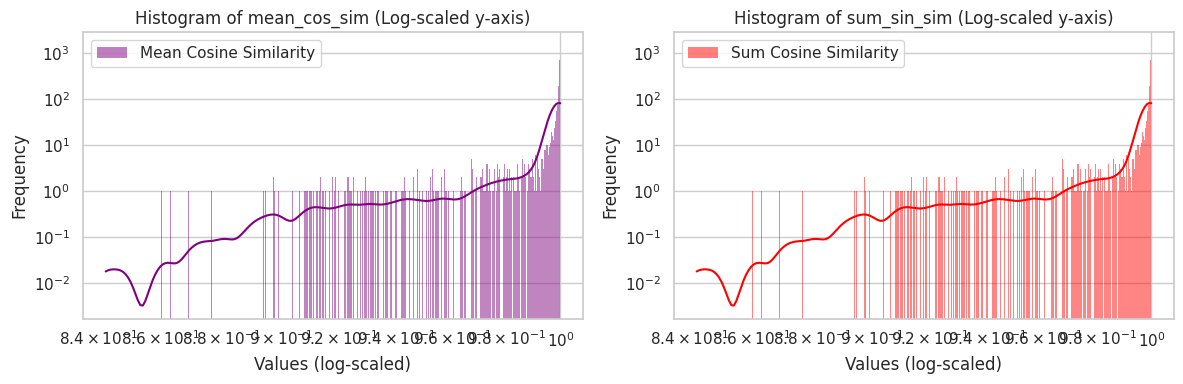

In [219]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_cos_sim', kde=True, color='purple', label='Mean Cosine Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_cos_sim', kde=True, color='red', label='Sum Cosine Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_cos_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_sin_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

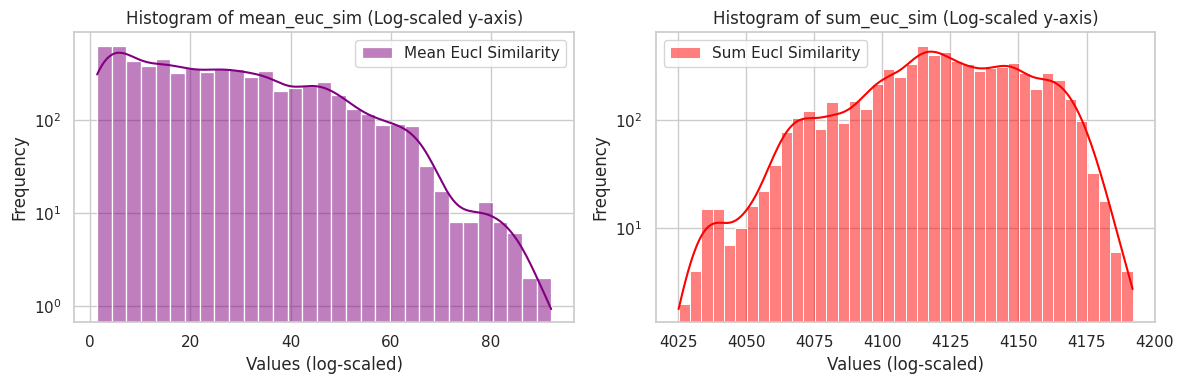

In [218]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_euc_sim', kde=True, color='purple', label='Mean Eucl Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_euc_sim', kde=True, color='red', label='Sum Eucl Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')


axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_euc_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_euc_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()